#Objective
1. Classisfication of people who survived after the surgery and did not survive.
2. To see if there is any pattern involved for either of the cases

# Importing all the required libraries and ingnoring warnings

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Reading the csv file using pandas and giving new feature names

In [2]:
h_man=pd.read_csv('haberman .csv',names=["age","operation_year","axil_nodes","survival_status"])
h_man.head()

,age,operation_year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


##Changing the survival status 1 to "yes" and 2 to "no"

In [3]:
h_man['survival_status'] = h_man['survival_status'].map({1:'yes',2:'no'})
h_man['survival_status'] = h_man['survival_status'].astype('category')
h_man.head()

,age,operation_year,axil_nodes,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


# 1.1 High level statistics

In [4]:
h_man.duplicated().value_counts()

False    289
True      17
dtype: int64

In [5]:
h_man.shape

(306, 4)

In [6]:
h_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              306 non-null    int64   
 1   operation_year   306 non-null    int64   
 2   axil_nodes       306 non-null    int64   
 3   survival_status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [7]:
h_man['survival_status'].value_counts(normalize = True)

yes    0.735294
no     0.264706
Name: survival_status, dtype: float64

In [8]:
h_man['survival_status'].value_counts()

yes    225
no      81
Name: survival_status, dtype: int64

In [9]:
h_man.describe()

,age,operation_year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [10]:
h_man["axil_nodes"].value_counts()

0     136
1      41
3      20
2      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
22      3
19      3
23      3
15      3
10      3
20      2
12      2
21      1
52      1
30      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: axil_nodes, dtype: int64

###**Observations**
From above analysis

1. 17 duplicate values found

2. There are 306 points and 4 features. No null values and 3 features are integer. Last feature is categorical but provided as integer value 1 or 2.

3. The overall survival rate is 73% and 225 survived out of 306

4. The mean age of people undergoing surgery: 52.45

5. Even though the max number of nodes is 52 the average is 4 i.e quite low

6.  
  0. 44% of the data is of people with 0 axil nodes
    
  1. we can see that the data is not uniform. The data is mostly with node values 0,1,2,3,4.

  2. We can also say that higher nodes may not be common or most people tend to the problem in early stages





# Univariate analysis

##PDF

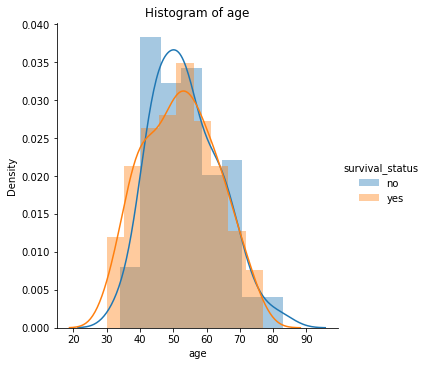

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


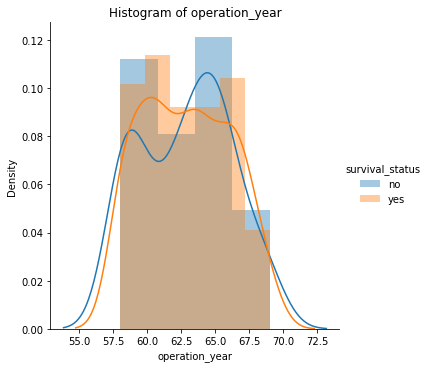

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


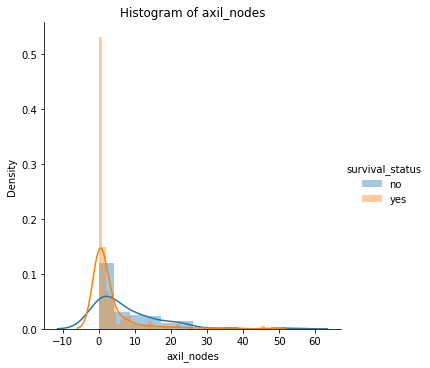

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [11]:
for idx, column_name in enumerate(list(h_man.columns)[0:-1]):
  sns.FacetGrid(h_man, hue = "survival_status", size = 5)\
  .map(sns.distplot, column_name).add_legend()
  plt.title("Histogram of "+column_name)
  plt.show()
  print("~"*50)

###**Observations**
1. PDF of age looks like bell shaped distribution in both survival status yes and no.Both are overlapped and cannot distinguish.
2. PDF of operation_year is more flat compared to age distribution and are overlapped. Cannot distinguish the survival status.
3. In axil_nodes PDF, we know that there are no values below zero. From the plot we can say that there are lot of cases of **yes** near the axil_nodes count zero. Both distribuitions are overlapped. Both are skewed and have long tails.

##PDF + CDF

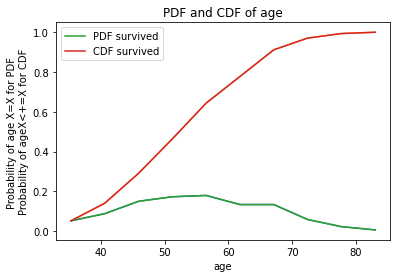

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


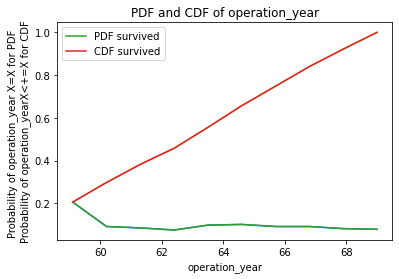

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


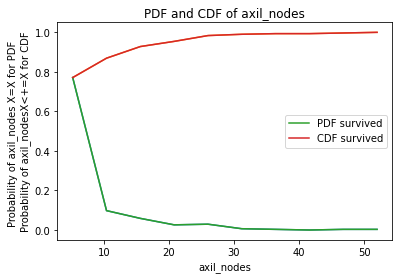

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [12]:
for idx, column_name in enumerate(list(h_man.columns)[0:-1]):
  counts, bin_edges = np.histogram(h_man[column_name], bins = 10, 
                                   density = True)
  pdf = counts/(sum(counts))
  cdf = np.cumsum(pdf)
  plt.plot(bin_edges[1:],pdf)
  plt.plot(bin_edges[1:],cdf)
  plt.xlabel(column_name);
  plt.ylabel("Probability of "+ column_name +" X=X for PDF \nProbability of "+ column_name +"X<+=X for CDF")
  
  plt.title("PDF and CDF of "+column_name)
  arr1, = plt.plot(bin_edges[1:],pdf);
  arr2, = plt.plot(bin_edges[1:], cdf)
  plt.legend([arr1,arr2], ['PDF survived','CDF survived']) 
  plt.show()
  print("~"*50)

In [13]:
#gives % of values of axil_nodes that are <=30
h_man.loc[h_man['axil_nodes'] <= 30]['axil_nodes'].count()/h_man['axil_nodes'].count()*100

99.01960784313727

###**Observations**
1. The age and operation_year are almost uniformly distributed because their cdfs are linear almost
2. From cdf of Axil_nodes we can say that below 30 axil_nodes contains most of the data.
3. We can see that 99% of the values are <=30

##Boxplots

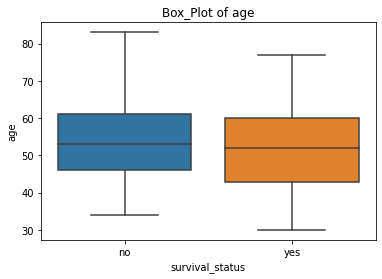

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


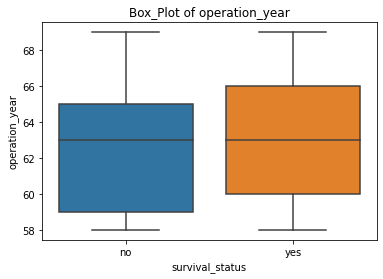

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


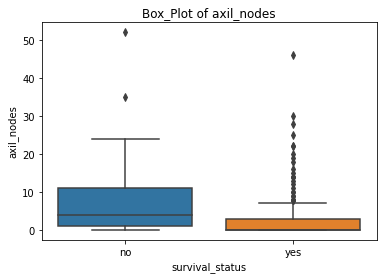

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [14]:
for idx, column_name in enumerate(list(h_man.columns)[0:-1]):
  sns.boxplot(x="survival_status",y = column_name,data = h_man)
  plt.title("Box_Plot of "+ column_name)
  plt.show()
  
  print("~"*50)

###**Observations**
1. No distinction can be observed from both age and operation_year
2. We can see that there are outliers in the axil_nodes data

##Violinplots

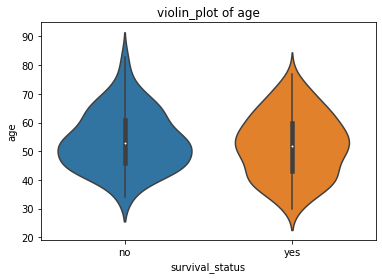

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


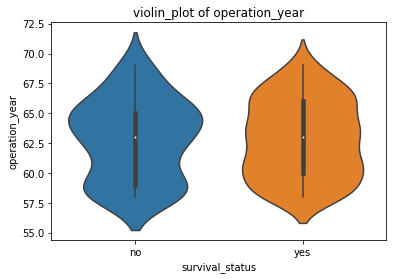

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


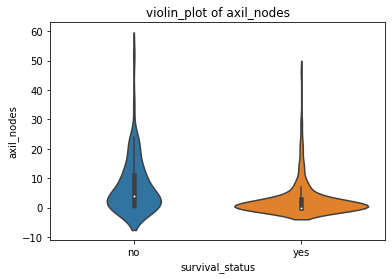

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [15]:
for idx, column_name in enumerate(list(h_man.columns)[0:-1]):
  sns.violinplot(x="survival_status",y = column_name,data = h_man)
  plt.title("violin_plot of "+column_name)
  plt.show()
  print("~"*50)

###**No significant obsevations**

# Bivariate analysis


##Pairplots


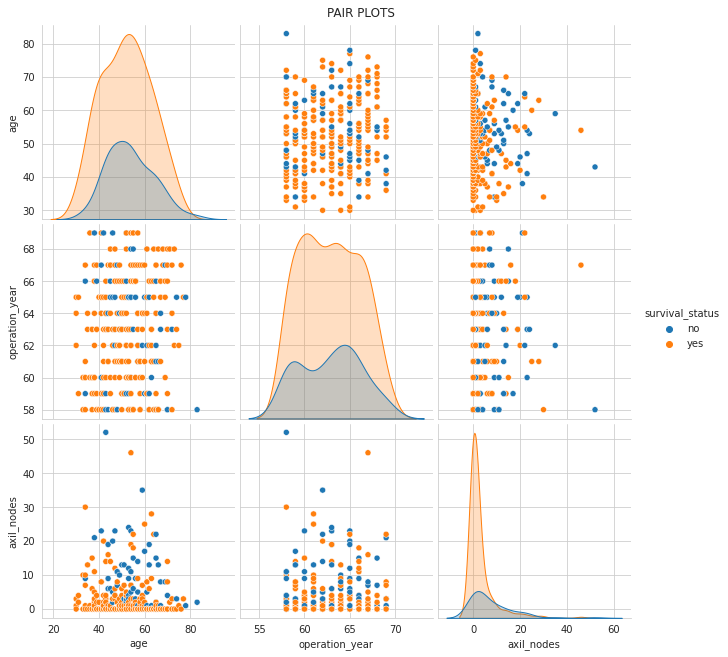

In [16]:
sns.set_style("whitegrid")

sns.pairplot(h_man, hue = 'survival_status',size = 3)
plt.suptitle("PAIR PLOTS", x=0.5,y=1.01)

plt.show()

###**Observations**
1. No new observations

# Classification based on number of nodes
ref: https://www.cancer.net/cancer-types/breast-cancer/stages

The cancer stages is classified as follows based on number of nodes affected

N0: no cancer is found in the nodes.

N1: 1 to 3 nodes are effected.

N2: 4 to 9 nodes are effected.

N3: 10 or more nodes are effected.

 


survival rate of N0 86.02941176470588
survival rate of N1 75.30864197530865
survival rate of N2 60.86956521739131
survival rate of N3 55.81395348837209



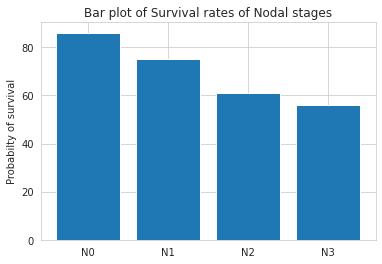

In [17]:
# creating seperate data frames for each condition
N0 = h_man[h_man.axil_nodes == 0]
N1 = h_man[(h_man.axil_nodes >= 1) & (h_man.axil_nodes <= 3)]
N2 = h_man[(h_man.axil_nodes >= 4) & (h_man.axil_nodes <= 9)]
N3 = h_man[h_man.axil_nodes >= 10]

#survival rate of each condition
surv_cond_nodes = dict()
for i,ds in enumerate((N0,N1,N2,N3)):
  print("survival rate of N",end="")
  print(i,ds['survival_status'].value_counts(normalize = True)[0]*100)
  surv_cond_nodes["N"+str(i)] = ds['survival_status'].value_counts(normalize = True)[0]*100

#bar graphs of survival rates of different node stages
names = list(surv_cond_nodes.keys())
values = list(surv_cond_nodes.values())

plt.bar(range(len(surv_cond_nodes)), values, tick_label=names)
plt.title("Bar plot of Survival rates of Nodal stages")
plt.ylabel("Probabilty of survival")
print()
plt.show()

###**Observations**
1. The survival rate is decreasing with nodal stage
2. The survival rates of Nodal stages

| Nodal Stage| Survival rate|
|------------|--------------|
|N0          |86.03%        |
|N1          |75.30%        |
|N2          |60.86%        |
|N3          |55.81%        |



##Classification based on age
40 to 60 is considered as middle aged generally

so lets say

young = age < 40

middle_age = age in [40,60]

Old = age > 60



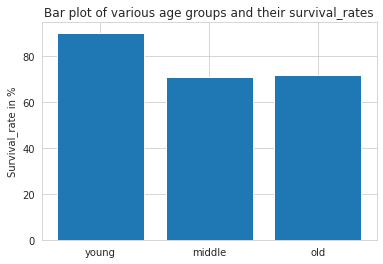

[90.0, 70.8994708994709, 71.42857142857143]


In [23]:
#creating datasets based on age
young = h_man[h_man.age <40]
middle = h_man[(h_man.age >=40)&(h_man.age <= 60)]
old = h_man[h_man.age > 60]

#survival rate based on age
surv_cond_age = dict()
for i,ds in enumerate((young,middle,old)):
  surv_cond_age[i] = ds['survival_status'].value_counts(normalize = True)[0]*100

#plotting bar graphs 
values = list(surv_cond_age.values())
plt.bar(range(len(surv_cond_age)), values, tick_label=['young','middle','old'])
plt.title("Bar plot of various age groups and their survival_rates")
plt.ylabel("Survival_rate in %")
plt.show()

print(values)

###**Observations**
1. Young age group has the highest survival rate of 90%
2. The middle and old age groups have similar survival rates 70.89% and 71.42%


##Classification of young based on node stages

survival rate of young_n0 88.23529411764706
survival rate of young_n1 100.0
survival rate of young_n2 83.33333333333334
survival rate of young_n3 85.71428571428571



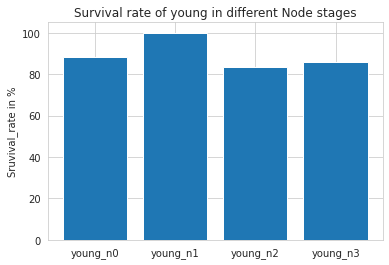

In [19]:
young_n0 = young[young.axil_nodes == 0]
young_n1 = young[(young.axil_nodes >= 1) & (young.axil_nodes <= 3)]
young_n2 = young[(young.axil_nodes >= 4) & (young.axil_nodes <= 9)]
young_n3 = young[young.axil_nodes >= 10]

surv_cond_nodes_young = dict()
for i,ds in enumerate((young_n0,young_n1,young_n2,young_n3)):
  print("survival rate of young_n",end="")
  print(i,ds['survival_status'].value_counts(normalize = True)[0]*100)
  surv_cond_nodes_young["young_n"+str(i)] = ds['survival_status'].value_counts(normalize = True)[0]*100


print()
names = list(surv_cond_nodes_young.keys())
values = list(surv_cond_nodes_young.values())

plt.bar(range(len(surv_cond_nodes_young)), values, tick_label=names)
plt.ylabel("Sruvival_rate in %")
plt.title("Survival rate of young in different Node stages")
plt.show()

###**Observations**
1. The nodal stage N1 has a 100% survival rate.
2. Below table gives the survival rates of all stages

| Nodal Stage| Survival rate|
|------------|--------------|
|N0          |88.23%        |
|N1          |100%          |
|N2          |83.33%        |
|N3          |85.71%        |


##Classification of middle based on node stages

survival rate of middle_n0 84.72222222222221
survival rate of middle_n1 77.19298245614034
survival rate of middle_n2 59.375
survival rate of middle_n3 64.28571428571429



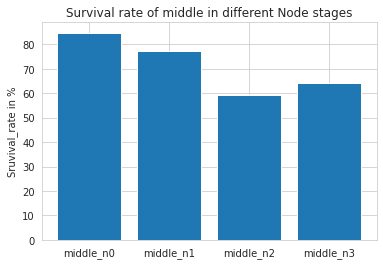

In [20]:
middle_n0 = middle[middle.axil_nodes == 0]
middle_n1 = middle[(middle.axil_nodes >= 1) & (middle.axil_nodes <= 3)]
middle_n2 = middle[(middle.axil_nodes >= 4) & (middle.axil_nodes <= 9)]
middle_n3 = middle[middle.axil_nodes >= 10]

surv_cond_nodes_middle = dict()
for i,ds in enumerate((middle_n0,middle_n1,middle_n2,middle_n3)):
  print("survival rate of middle_n",end="")
  print(i,ds['survival_status'].value_counts(normalize = True)[0]*100)
  surv_cond_nodes_middle["middle_n"+str(i)] = ds['survival_status'].value_counts(normalize = True)[0]*100

print()
names = list(surv_cond_nodes_middle.keys())
values = list(surv_cond_nodes_middle.values())

plt.bar(range(len(surv_cond_nodes_middle)), values, tick_label=names)
plt.ylabel("Sruvival_rate in %")
plt.title("Survival rate of middle in different Node stages")
plt.show()

###**Observations**
1. N0 has the highest survival rate of 84.72%
2. Below table gives all the survival rates

| Nodal Stage| Survival rate|
|------------|--------------|
|N0          |84.72%        |
|N1          |77.19%        |
|N2          |59.37%        |
|N3          |64.28%        |


##Classification of old based on node stages

survival rate of old_n0 87.2340425531915
survival rate of old_n1 50.0
survival rate of old_n2 50.0
survival rate of old_n3 62.5



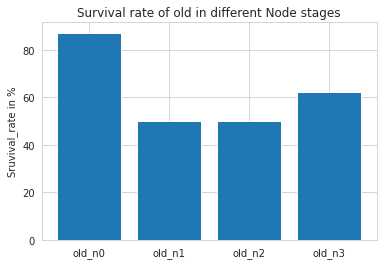

In [21]:
old_n0 = old[old.axil_nodes == 0]
old_n1 = old[(old.axil_nodes >= 1) & (old.axil_nodes <= 3)]
old_n2 = old[(old.axil_nodes >= 4) & (old.axil_nodes <= 9)]
old_n3 = old[old.axil_nodes >= 10]

surv_cond_nodes_old = dict()
for i,ds in enumerate((old_n0,old_n1,old_n2,old_n3)):
  print("survival rate of old_n",end="")
  print(i,ds['survival_status'].value_counts(normalize = True)[0]*100)
  surv_cond_nodes_old["old_n"+str(i)] = ds['survival_status'].value_counts(normalize = True)[0]*100

print()
names = list(surv_cond_nodes_old.keys())
values = list(surv_cond_nodes_old.values())

plt.bar(range(len(surv_cond_nodes_old)), values, tick_label=names)
plt.ylabel("Sruvival_rate in %")
plt.title("Survival rate of old in different Node stages")
plt.show()

###**Observations**
1. N0 has highest survival rate of 87.23%
2. N1 and N2 stages have exactly 50% survival rate
3. N3 stage has survival rate of 62.5%



#Conclusion
##Highlevel statistics
*  17 duplicate values found. Analysis is done with out removing duplicates.
* 306 data points and 3 features and 2 classes.
*  Overall survival rate is 73%. 225 out of 306.
* Mean age of undergoing surgery is 52.45
* Even though the max number of axil_nodes is 52, the average is 4.
* 44% of the data is of people with 0 axil_nodes
## Univariate analysis
* PDF of age is bell shaped.
* PDF of year of operation is more uniformly distibuted.
* The Axil_node PDF is skewed
* 99% of the data points have Axil_nodes <= 30
## Bivariate analysis

*  The survival rate decreases with increase in number of effected nodes. The survival rate decreases with the nodal stages as depicted in the analysis.
*  The survival rate of young aged patients is 90%. where as the other 2 categories have similar survival rate nearly 70%(70.89,71.42 respectively).
*  On further sub-calssification of age groups with nodal stages, it is found that there is 100% survival rate of young aged patients with N1 nodal stage. This is just an observation.
*  No other sub_classes showed any unique survival rates
*  Total data of survival rates based on age and nodal stages

|   | young   |     middle |    old  |Overall |
|---|---------|------------|---------|------- |
|N0 |  88.23  |  84.72     |    87.23| 86.03  |     
|N1 |  100.0  |  77.19     |    50.0 |  75.30 |    
|N2 |  83.33  |  59.37     |    50.0 |  60.86 |   
|N3 |  85.71  |  64.28     |    62.5 |  55.81 | 
|Overall|90.00|  70.89     |   71.42 |   73.00|
